### (a) Haz una gráfica de Q(t) para ambas partes del problema 4 

Para la primera parte $Q(t)=Q_0e^{-t/RC}$ 
Para la segunda $Q(t)=Q_0(1-e^{-t/RC})$

In [1]:
using Plots

In [34]:
function Q1(RC,t,Q_0)
    xs=range(0,stop=t,length=50)
    ys=[Q_0*exp(-x/(RC)) for x in xs]
    plot(xs,ys,xlabel="t",ylabel="Q(t)",label="parte 1")
end
function Q2(RC,t,Q_0)
    xs=range(0,stop=t,length=50)
    ys=[Q_0*(1-exp(-x/(RC))) for x in xs]
    plot(xs,ys,xlabel="t",ylabel="Q(t)",label="parte 2")
end

Q2 (generic function with 1 method)

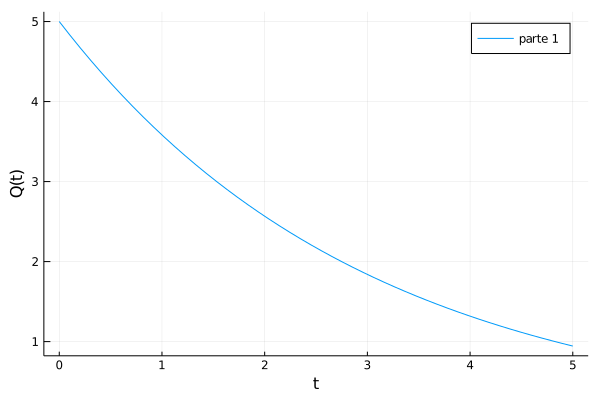

In [35]:
Q1(3,5,5)

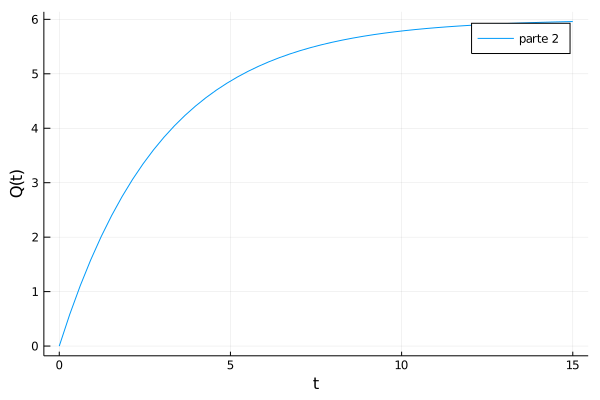

In [36]:
Q2(3,15,6)

### b) Determina y grafica I(t) primero mediante el comando diff y luego con las expresiones que se encontraron en el problema 4. ¿Existen diferencias?. Trata de cambiar el refinamiento de t en tu programa y observa qu ́e sucede con estas diferencias.

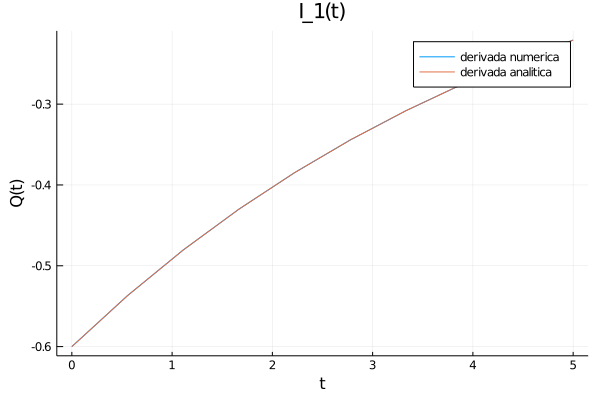

In [58]:
#promera parte
Q1(x)=3*exp(-x/(5))
h=0.01
xs=range(0,stop=5,length=10)
y1=[(Q1(i+h)-Q1(i-h))/2h for i in xs] #derivada numerica
y2=[-3/5*exp(-i/(5)) for i in xs] #derivada analitica
plot(xs,y1,label="derivada numerica",title="I_1(t)")
plot!(xs,y2,xlabel="t",ylabel="Q(t)",label="derivada analitica")

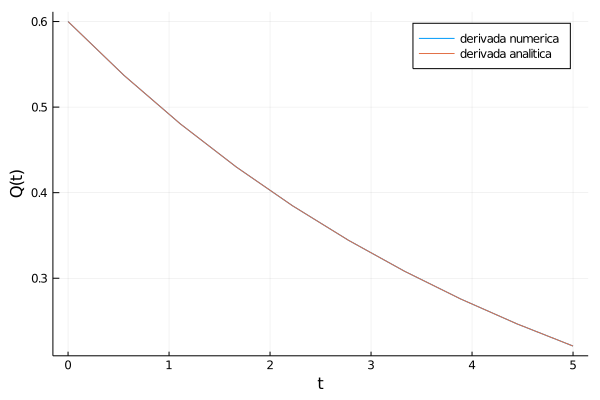

In [55]:
#segunda parte
Q2(x)=3*(1-exp(-x/(5)))
h=0.01
xs=range(0,stop=5,length=10)
y1=[(Q2(i+h)-Q2(i-h))/2h for i in xs] #derivada numerica
y2=[3/5*exp(-i/(5)) for i in xs] #derivada analitica
plot(xs,y1,label="derivada numerica",title="I_2(t)")
plot!(xs,y2,xlabel="t",ylabel="Q(t)",label="derivada analitica")

No alcanso ver diferiencias entre las curvas aun con hs grandes

### (c) Encuentra el calor cedido al resistor en ambas partes del problema 4 mediante integración directa con el comando trapz.

In [56]:
function inttrapez(f,a,b,n)
    #n subintervalos
    xs = range(a,stop = b, length = n+1)
    #Riemann
    integral = 0
    for i in range(1,stop=n)
        integral = integral + abs(f(xs[i])-f(xs[i+1]))/2 +f(xs[i])
    end
    integral = (b-a)/n * integral
    return integral
end

inttrapez (generic function with 1 method)

Para $I_1$ e $I_2$ $U=\int I^2 R dt$, siendo $R=1\Omega$  y usando los mismos parametros usados para los insisos anteriores tenemos que $P=I^2\Omega$

In [62]:
I1(x)=(-3/5*exp(-x/(5)))^2
I2(x)=(3/5*exp(-x/(5)))^2

I2 (generic function with 1 method)

In [63]:
inttrapez(I1,0,5,150)

0.7885857505169401

In [64]:
inttrapez(I2,0,5,150)

0.7885857505169401

Como podemos notar en ambos sitemas con la misma resistencia, capasitor y voltaje obteneos el mismo calos cedido 